**Part 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('atlas_z_to_ll.csv', delimiter=',', skiprows=1)

def Mass(E1, E2, Pt1, Pt2, phi1, phi2, n1, n2):
    px1 = Pt1*np.cos(phi1)
    px2 = Pt2*np.cos(phi2)
    py1 = Pt1*np.sin(phi1)
    py2 = Pt2*np.sin(phi2)
    pz1 = Pt1*np.sinh(n1)
    pz2 = Pt2*np.sinh(n2)
    px_total = px1 + px2
    py_total = py1 + py2
    pz_total = pz1 + pz2
    E_total = E1 + E2
    M = np.sqrt(E_total**2 - ((px_total)**2 + (py_total)**2 + (pz_total)**2))
    return M

Pt1 = data[:,0]
Pt2 = data[:,1]
n1 = data[:,2]
n2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

Mass = Mass(E1, E2, Pt1, Pt2, phi1, phi2, n1, n2)

print(Mass)

[92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693]


Text(0.5, 1.0, 'Histogram of Invariant Mass')

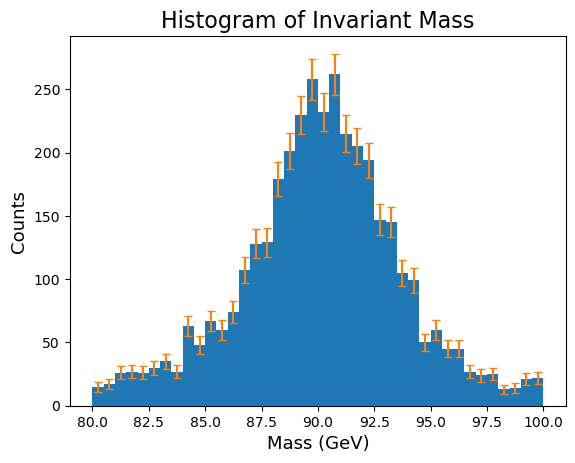

In [2]:
bins = np.linspace(80,100,41)

hist, bin_edges = np.histogram(Mass, bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
error = np.sqrt(hist)
fig, ax = plt.subplots(1,1)


ax.hist(Mass, bins=bins)
ax.errorbar(bin_centers, hist, yerr=error, linestyle="", capsize=3)

ax.set_xlabel("Mass (GeV)", fontsize=13)
ax.set_ylabel("Counts", fontsize=13)
ax.set_title("Histogram of Invariant Mass", fontsize=16)

**Part 2**

chisq: 9.99
reduced_chisq: 1.00
pvalue: 0.44
m0 best fit: 90.34+-0.09


Text(80, 190, 'chisq: 10.0\nNDOF: 10\nreduced_chisq: 1.0\npvalue: 0.4\nm0 best fit: 90.34+-0.09')

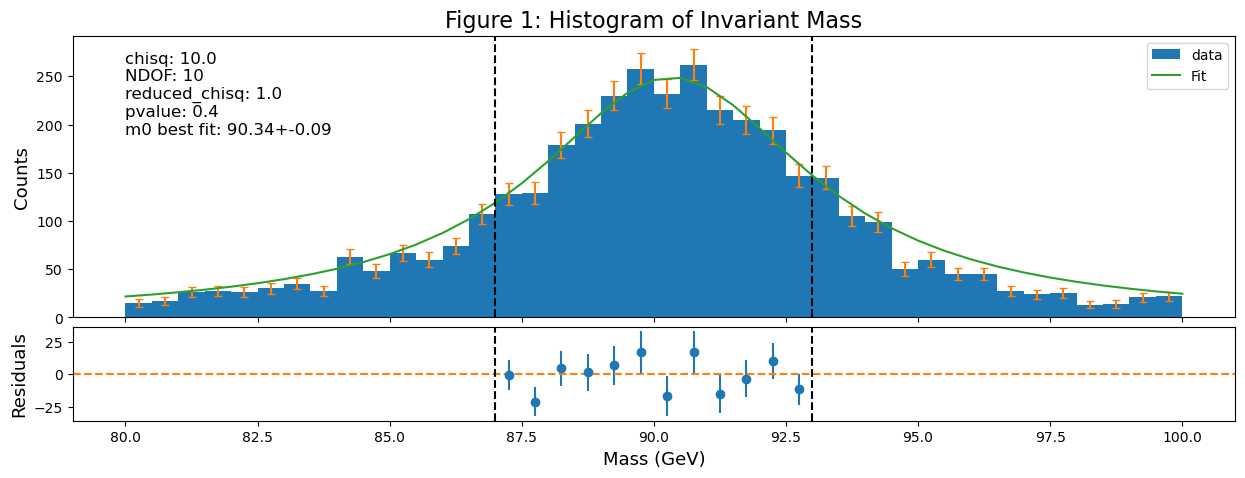

In [3]:
from scipy.optimize import curve_fit

def D(m, m0, gamma):
    return 2500*((1/np.pi)*(gamma/2))/((m-m0)**2+(gamma/2)**2)

mask = (bin_centers > 87) & (bin_centers < 93)
params, covar = curve_fit(f = D, xdata=bin_centers[mask], ydata=hist[mask], sigma=error[mask], absolute_sigma=True)

fig, (ax_top, ax_bot) = plt.subplots(
    2,1, sharex=True, figsize=(15,5), 
    gridspec_kw={'height_ratios':[3,1], 'hspace':0.05})

ax_top.hist(Mass, bins=bins, label="data")
ax_top.errorbar(bin_centers, hist, yerr=error, linestyle="", capsize=3)
m0_plot = params[0]
gamma_plot = params[1]
m_plot = bins
D_plot = D(m_plot, m0_plot, gamma_plot)
ax_top.plot(bins, D_plot, label= "Fit")
ax_top.legend()
ax_bot.set_xlabel("Mass (GeV)", fontsize=13)
ax_top.set_ylabel("Counts", fontsize=13)
ax_top.set_title("Figure 1: Histogram of Invariant Mass", fontsize=16)

residuals = hist[mask] - D(bin_centers[mask], *params)

ax_bot.errorbar(bin_centers[mask], residuals, yerr=error[mask], fmt="o", color="C0")
ax_bot.axhline(0, color="C1", ls="--")
ax_bot.axvline(87, color="black", ls="--")
ax_bot.axvline(93, color="black", ls="--")
ax_top.axvline(87, color="black", ls="--")
ax_top.axvline(93, color="black", ls="--")
ax_bot.set_ylabel("Residuals", fontsize=13)

import scipy.stats as st
chisq =  np.sum(((hist[mask]-D(bin_centers[mask], *params))/ error[mask])**2)
df= len(bin_centers[mask]) - 2
reduced_chisq = chisq/df
pvalue = st.chi2.sf(chisq, df)
print(f"chisq: {chisq:.2f}")
print(f"reduced_chisq: {reduced_chisq:.2f}")
print(f"pvalue: {pvalue:.2f}")
m0 = params[0]
m0_error = np.sqrt(covar[0][0])
print(f"m0 best fit: {m0:.2f}+-{m0_error:.2f}")
ax_top.text(
    80,190,
    f"chisq: {chisq:.1f}\nNDOF: {df}\nreduced_chisq: {reduced_chisq:.1f}\npvalue: {pvalue:.1f}\nm0 best fit: {m0:.2f}+-{m0_error:.2f}", fontsize=12
)


In [4]:
chisq =  np.sum(((hist[mask]-D(bin_centers[mask], *params))/ error[mask])**2)
df= len(bin_centers[mask]) - 2
reduced_chisq = chisq/df
pvalue = st.chi2.sf(chisq, df)
print(f"chisq: {chisq:.2f}")
print(f"reduced_chisq: {reduced_chisq:.2f}")
print(f"pvalue: {pvalue:.2f}")

chisq: 9.99
reduced_chisq: 1.00
pvalue: 0.44


In [5]:
m0 = params[0]
m0_error = np.sqrt(covar[0][0])
print(f"m0 best fit: {m0:.2f}+-{m0_error:.2f}")

m0 best fit: 90.34+-0.09


**Part 3**

In [8]:
n_bins=300
chi_map=np.zeros((n_bins,n_bins)) 
m0_2D=np.linspace(89,91,n_bins) 
gamma_2D=np.linspace(5,8,n_bins) 
for i in range(n_bins):
    for j in range(n_bins):
        theory = 2500*((1/np.pi)*(gamma_2D[j]/2))/((bin_centers[mask]-m0_2D[i])**2+(gamma_2D[j]/2)**2)
        chi2 = np.sum((theory-hist[mask])**2/error[mask]**2)
        chi_map[j,i]=chi2

chi_min = chi_map.min()
chi_map = np.clip(chi_map,chi_min,chi_min+35)
delta_chi_map = chi_map - chi_min

In [7]:
from scipy.stats import chi2

delta_chisq1 = chi2.ppf(0.68, 2)
delta_chisq3 = chi2.ppf(0.9973, 2)
print(delta_chisq1, delta_chisq3)

2.27886856637673 11.82900701194368


Text(0.5, 1.0, 'Figure 2: 2D Mass-Width Parameter Space')

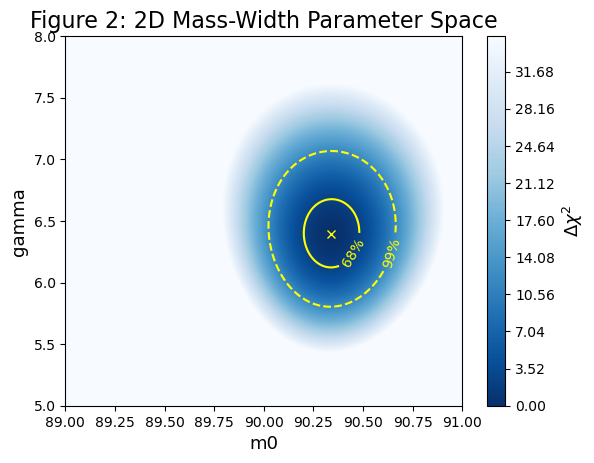

In [18]:
X,Y = np.meshgrid(m0_2D,gamma_2D)
fig2, ax2 = plt.subplots(1,1)
cs = ax2.contourf(X,Y,delta_chi_map,500,cmap='Blues_r') 
ax2.set_xlabel("m0", fontsize=13)
ax2.set_ylabel("gamma", fontsize=13)
cbar = fig2.colorbar(cs,ax=ax2)  
cbar.set_label(r"$\Delta \chi^2$", fontsize=13)


levels = [2.28,11.8]
CS = ax2.contour(X,Y,delta_chi_map,levels,colors=['yellow','yellow'],linestyles=['solid','dashed'])
fmt = {}
strs = ['68%', '99%']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax2.clabel(CS,CS.levels,inline=True,fmt=fmt)
ax2.plot(m0_plot, gamma_plot, marker="x", color="yellow")
ax2.set_title("Figure 2: 2D Mass-Width Parameter Space", fontsize=16)